## Observations and Insights 

1. Based off of the data in the bar graphs, the longest drug regimen trials lasted approximately 45 days.
2. With a correlation coefficient of 0.84, you can infer that there is a strong correlation between average tumor volume and the weight of the mouse.
3. By observing the line graph, the drug Capomulin was successful in decreasing the size of mouse s185's tumor.

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata.head()
#study_results.head()
# Combine the data into a single dataset
combo_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combo_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
indiv_mice = combo_data["Mouse ID"].value_counts()
mice_total = len(indiv_mice)
mice_total

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combo_data.loc[combo_data.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combo_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_indiv_mice = cleaned_data["Mouse ID"].value_counts()
clean_mice_total = len(clean_indiv_mice)
clean_mice_total

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mouse_mean = combo_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mouse_median = combo_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
mouse_var = combo_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
mouse_std = combo_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
mouse_sem = combo_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
summary_table = pd.DataFrame({"Mean": mouse_mean, "Median": mouse_median, 
                              "Variance": mouse_var, "Standard Deviation": mouse_std, "SEM": mouse_sem})
summary_table


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table2 = cleaned_data.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
summary_table2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

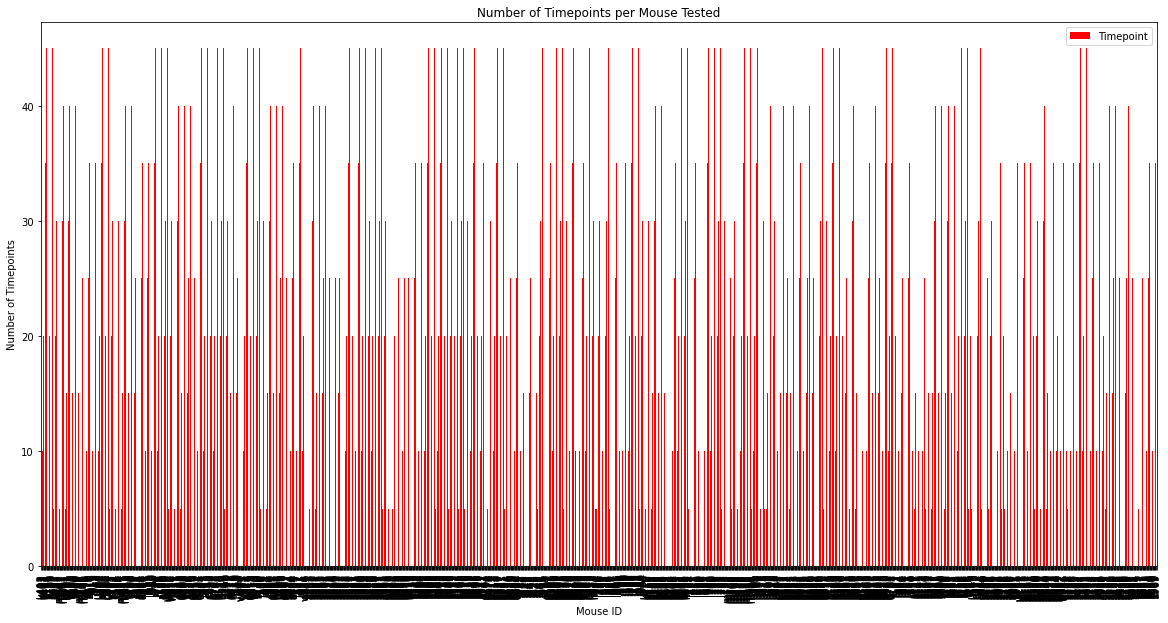

<Figure size 432x288 with 0 Axes>

In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

points_bar = combo_data[["Mouse ID","Timepoint"]]
points_bar = points_bar.set_index("Mouse ID")
#points_bar.head()
points_bar.plot(kind='bar', color='red', figsize=(20,10))
#points_bar.set_xticklabels(combo_data["Mouse ID"], rotation=90, fontsize='x-small')


plt.title("Number of Timepoints per Mouse Tested")
plt.xlabel("Mouse ID")
plt.ylabel("Number of Timepoints")
plt.show()
plt.tight_layout()


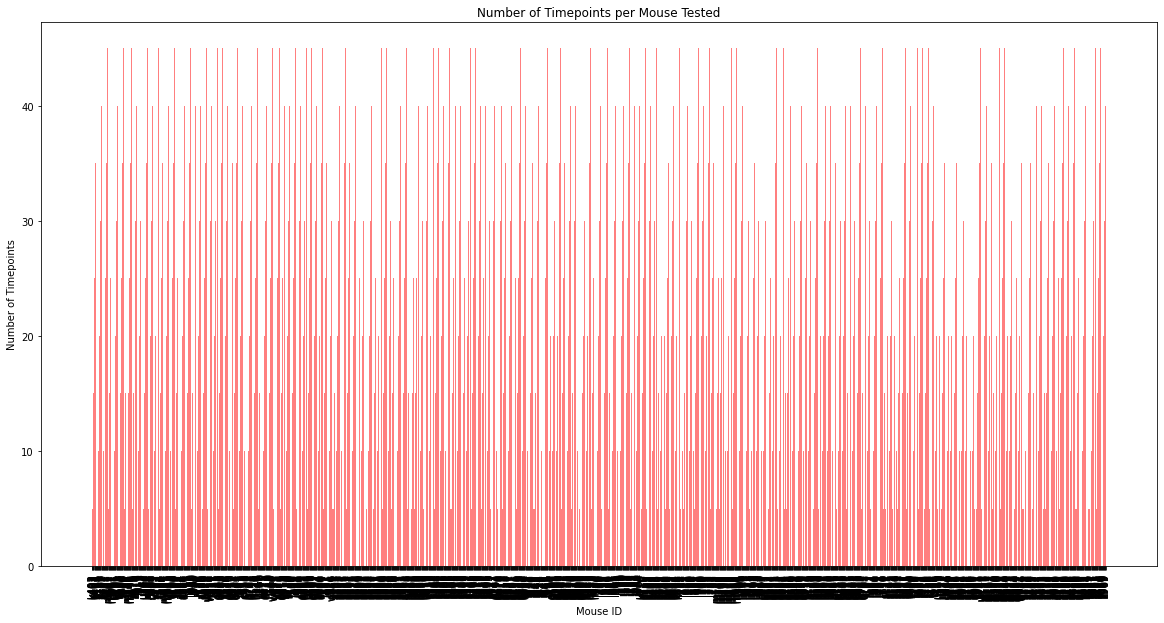

In [41]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(points_bar))
tick_locations = [value+0.4 for value in x_axis]
fig1, ax1 = plt.subplots(figsize=(20,10))
plt.xticks(tick_locations, points_bar.index.values, rotation="vertical")
plt.bar(x_axis, combo_data["Timepoint"], color='r', alpha=0.5, align="edge")
plt.title("Number of Timepoints per Mouse Tested")
plt.xlabel("Mouse ID")
plt.ylabel("Number of Timepoints")
plt.show()


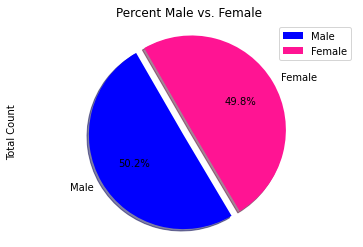

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = combo_data.loc[:, ["Sex", "Mouse ID"]]
mouse_gender = mouse_gender.drop_duplicates()
gender_count = mouse_gender["Sex"].value_counts()

gender_df = pd.DataFrame({"Total Count": gender_count})
labels = ["Male", "Female"]
colors = ["blue", "deeppink"]
explode = (0.1, 0)
pie_pandas = gender_df.plot(kind="pie", labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", 
                            shadow=True, startangle=120, y="Total Count", title="Percent Male vs. Female" )
plt.axis("equal")
plt.show()

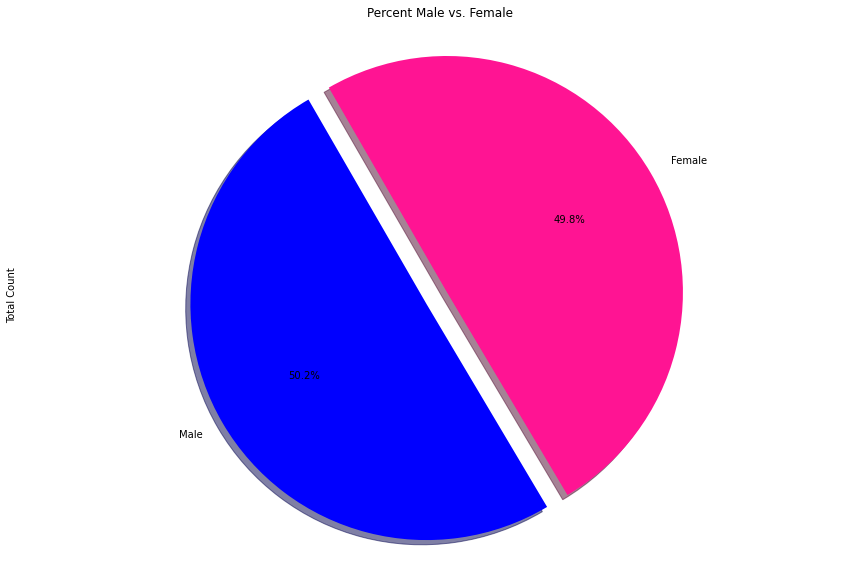

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender = combo_data.loc[:, ["Sex", "Mouse ID"]]
mouse_gender = mouse_gender.drop_duplicates()
gender_count = mouse_gender["Sex"].value_counts()

labels = ["Male", "Female"]
colors = ["blue", "deeppink"]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.title("Percent Male vs. Female")
plt.ylabel("Total Count")
plt.pie(gender_count, labels=labels, colors=colors, explode=explode, startangle=120, shadow=True, autopct="%1.1f%%")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor = cleaned_data.groupby(["Mouse ID"])["Timepoint"].max()
final_tumor
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_df = pd.merge(final_tumor, cleaned_data, on=(["Mouse ID", "Timepoint"]))
tumor_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

  #Couldn't figure this part out  
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

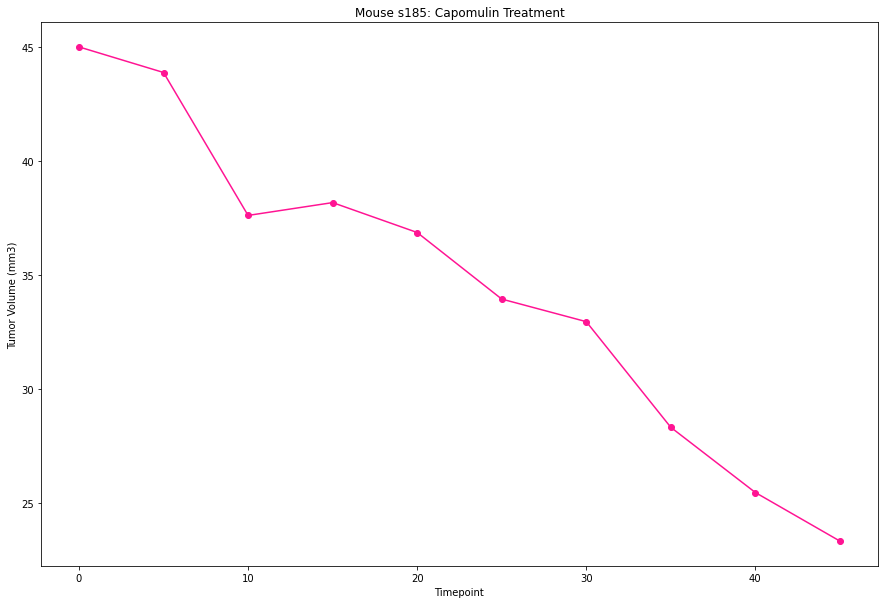

In [76]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_df = combo_data.loc[combo_data["Drug Regimen"]=="Capomulin", :]
cap_df

cap_mice = cap_df.loc[cap_df["Mouse ID"]== "s185", :]
cap_mice

x_axis = cap_mice["Timepoint"]
cap_vol = cap_mice["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15,10))
plt.plot(x_axis, cap_vol, marker='o', color='deeppink')
plt.title("Mouse s185: Capomulin Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

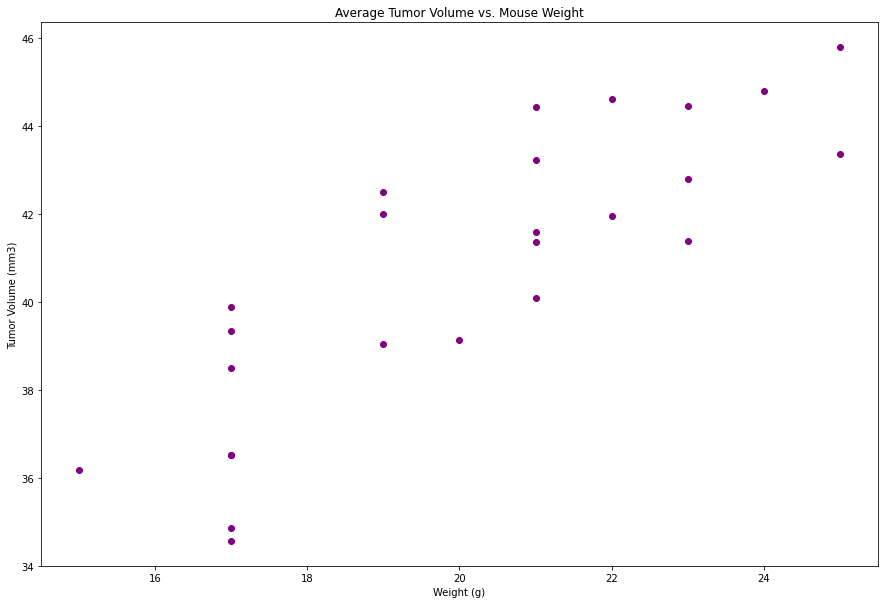

In [78]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scat_cap_df = cap_df.groupby(["Mouse ID"]).mean()
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.scatter(scat_cap_df["Weight (g)"], scat_cap_df["Tumor Volume (mm3)"], color="purple")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [84]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(scat_cap_df["Weight (g)"], scat_cap_df["Tumor Volume (mm3)"])[0],2)
print({correlation})

x_value = scat_cap_df["Weight (g)"]
y_value = scat_cap_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_equation)


{0.84}
y = 0.95x + 21.55


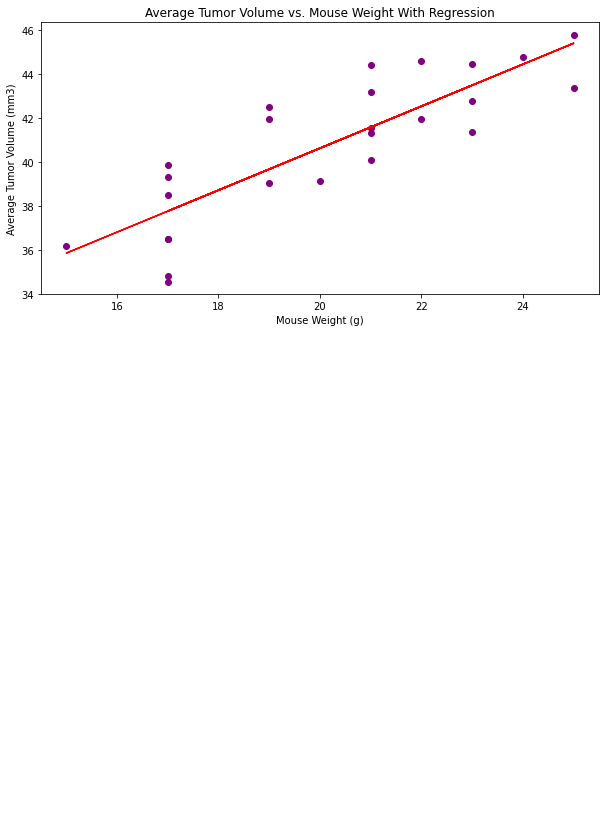

In [85]:
fig1, ax1 = plt.subplots(figsize=(10,5))
plt.scatter(x_value, y_value, color="purple")
plt.plot(x_value, regress_value, "r-")
plt.title("Average Tumor Volume vs. Mouse Weight With Regression")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(line_equation, (20,10), fontsize=15, color="red")
plt.show()